In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import Counter

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='huilyu2', api_key='LYEkqxDQFmZzZIBXn9rn')
import plotly.plotly as py
from plotly.graph_objs import *

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 16)

In [4]:
trips_df = pd.read_csv("GTFS Dataset/trips.csv")

In [5]:
trips_df.columns

Index(['route_id', 'service_id', 'trip_id', 'trip_headsign', 'direction_id',
       'block_id', 'shape_id'],
      dtype='object')

In [6]:
trips_df.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,TEAL,T4 UIMF,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 26
1,TEAL,T4 UIMF,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
2,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
3,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
4,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13


How many trips for each route?

In [7]:
len(np.unique(trips_df["route_id"])) # How many routes in all

100

In [8]:
trips_count = Counter(trips_df["route_id"])
trips_count.values()

dict_values([23, 71, 56, 76, 21, 1, 4, 9, 4, 138, 16, 32, 8, 5, 29, 12, 22, 3, 23, 135, 112, 238, 4, 25, 1, 60, 89, 94, 45, 33, 76, 1, 21, 224, 34, 69, 27, 6, 16, 30, 222, 48, 36, 19, 2, 38, 51, 1, 21, 72, 49, 20, 25, 53, 333, 36, 122, 63, 5, 37, 40, 49, 116, 67, 59, 8, 48, 108, 21, 34, 9, 32, 84, 50, 29, 4, 92, 111, 52, 1, 6, 54, 12, 47, 39, 88, 61, 68, 24, 27, 141, 250, 129, 127, 76, 46, 3, 33, 38, 69])

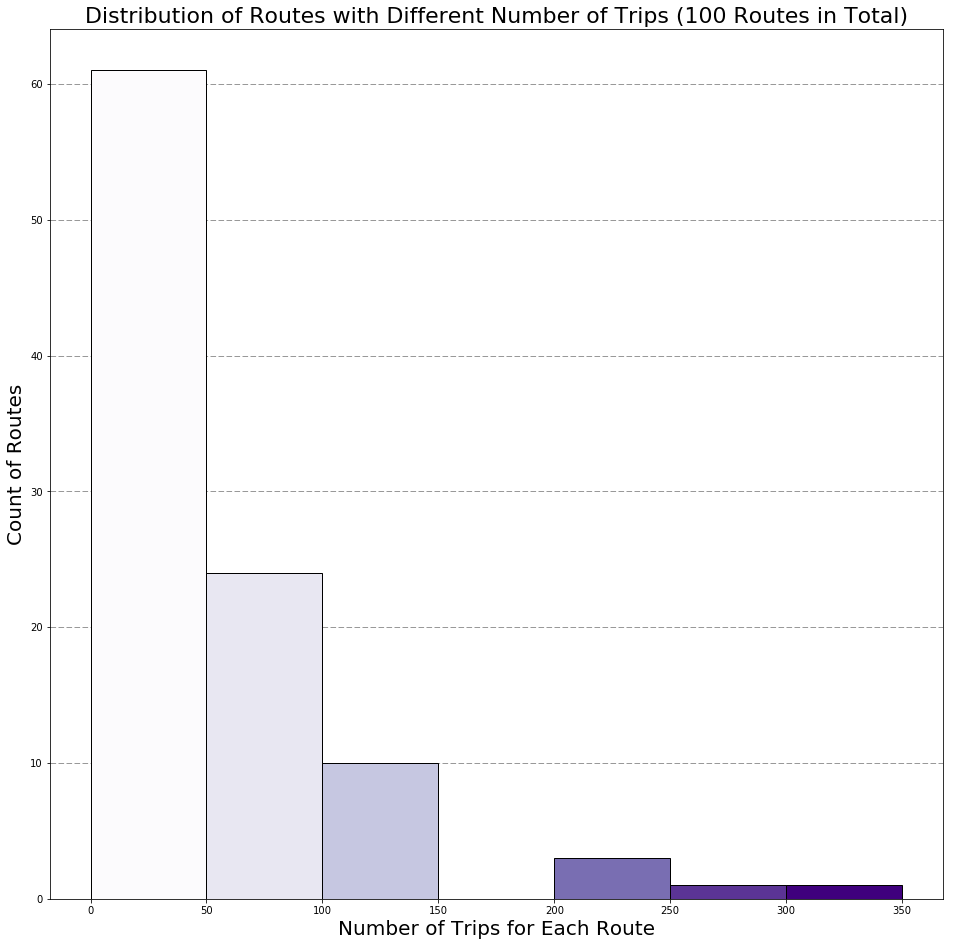

In [9]:
fig, ax = plt.subplots()

n, bins, patches = plt.hist(list(trips_count.values()),bins=np.arange(0,400,50),edgecolor = 'k')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
cm = plt.cm.get_cmap('Purples')

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.xlabel("Number of Trips for Each Route",fontsize=20)
plt.ylabel("Count of Routes",fontsize=20)
plt.title("Distribution of Routes with Different Number of Trips (100 Routes in Total)",fontsize=22)
plt.xticks(bins)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

In [10]:
trips_count.most_common(10)

[('SILVER', 333),
 ('ILLINI', 250),
 ('TEAL', 238),
 ('ILLINI EVENING', 224),
 ('TEAL SATURDAY', 222),
 ('YELLOWHOPPER', 141),
 ('ILLINI LIMITED SATURDAY', 138),
 ('ILLINI EVENING SATURDAY', 135),
 ('GREEN SATURDAY', 129),
 ('YELLOW SATURDAY', 127)]

In [11]:
shape_id_dict = {}
trip_count_dict = {}
for word, count in trips_count.most_common(10):
    trip_count_dict[word]=count # A route corresponds to its number of trips
    shape_id_dict[word]=np.unique(trips_df[trips_df.route_id == word][["shape_id"]])
    # A route correponds to its several shapes

In [12]:
import operator
trip_count_list = sorted(trip_count_dict.items(), key=operator.itemgetter(1), reverse=True)
trip_count_df = pd.DataFrame(trip_count_list,columns = ['route_id', 'number of trips'])

In [13]:
trip_count_df

,route_id,number of trips
0,SILVER,333
1,ILLINI,250
2,TEAL,238
3,ILLINI EVENING,224
4,TEAL SATURDAY,222
5,YELLOWHOPPER,141
6,ILLINI LIMITED SATURDAY,138
7,ILLINI EVENING SATURDAY,135
8,GREEN SATURDAY,129
9,YELLOW SATURDAY,127


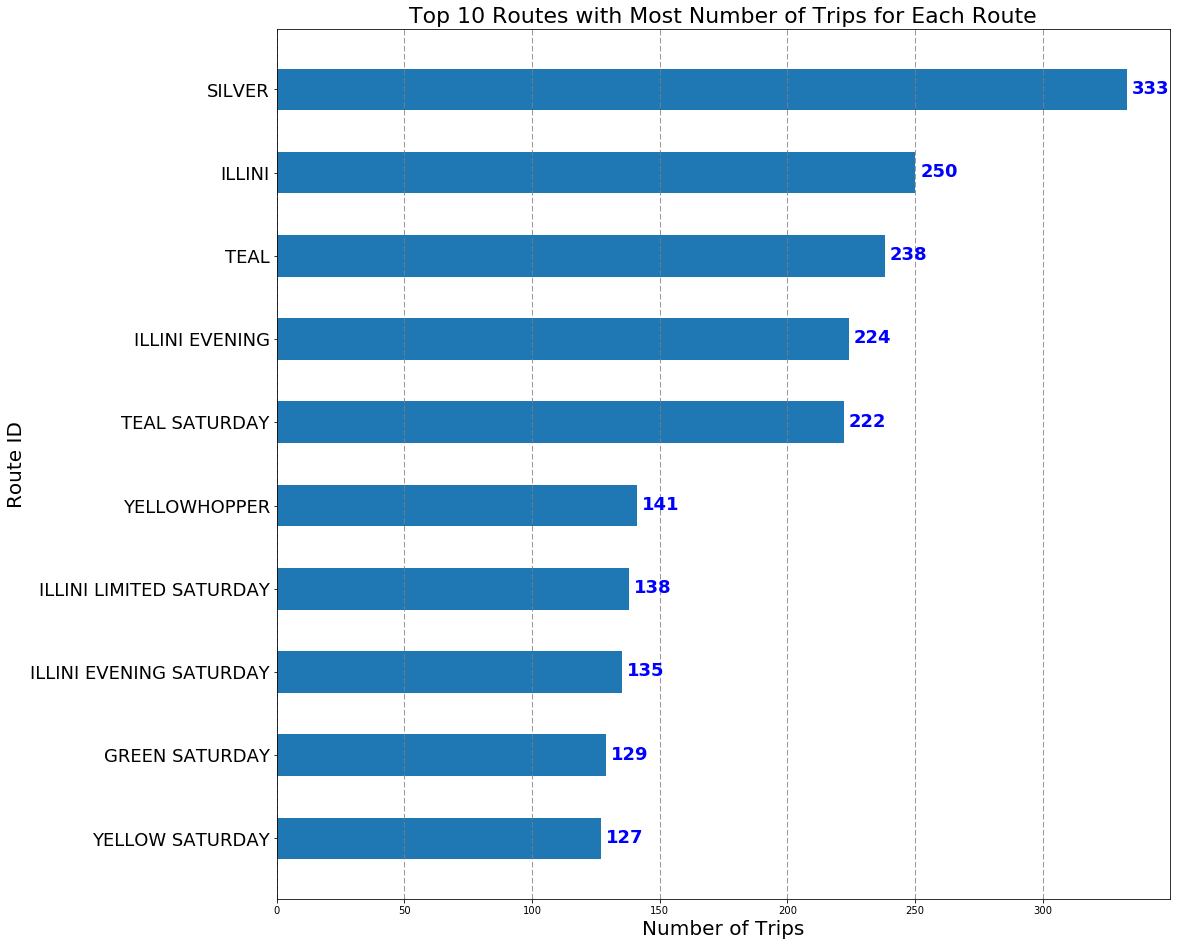

In [14]:
fig, ax = plt.subplots()
plt.barh(bottom=np.arange(10)[::-1], width=trip_count_df['number of trips'], height=0.5)
plt.xlabel("Number of Trips",fontsize=20)
plt.ylabel("Route ID",fontsize=20)
ax.set_yticks(np.arange(10)[::-1])
ax.set_yticklabels(trip_count_df['route_id'], fontsize=18)
plt.title("Top 10 Routes with Most Number of Trips for Each Route",fontsize=22)
ax.xaxis.grid(color='gray', linestyle='dashed') 
for i, v in enumerate(trip_count_df['number of trips'][::-1]):
    ax.text(v + 2, i-0.05, str(v), color='blue', fontweight='bold', fontsize=18)

In [15]:
shape_id_dict

{'GREEN SATURDAY': array(['50E->MNBDY', '50E->PC', '50E-WKND-HP->CF', 'GN1SATPO', 'GN1SUNPO',
        'GREEN WEEKEND 23', 'GREEN WEEKEND 44', '[@15.0.63188916@]15',
        '[@15.0.68513015@]219', '[@15.0.68513015@]220',
        '[@15.0.73006437@]18', '[@15.0.73006437@]37', '[@15.0.73006437@]38'], dtype=object),
 'ILLINI': array(['22N ILLINI 10', '22S ILLINI 20', '22S ILLINI 21', 'ILLINI 34',
        'ILLINI 46', 'ILLINI 47', '[@15.0.63192528@]43',
        '[@15.0.66063553@]12', '[@15.0.68513188@]4'], dtype=object),
 'ILLINI EVENING': array(['220N ILLINI 10', '220S ILLINI 20', 'ILLINI EV 25',
        '[@14.0.56288498@]24', '[@2.0.85634827@]37'], dtype=object),
 'ILLINI EVENING SATURDAY': array(['[@124.0.92260187@]220N ILLINI 10',
        '[@124.0.92260187@]220S ILLINI 20', '[@124.0.92260187@]24',
        '[@124.0.92260187@]ILLINI EV 25'], dtype=object),
 'ILLINI LIMITED SATURDAY': array(['22N ILLINI LIMITED WEEKEND', 'GR2PO', 'ILLINI LIMITED WEEKEND 845'], dtype=object),
 'SILVER': arr

In [16]:
trips_count.most_common()[:-11:-1]

[('1N YELLOW ALT', 1),
 ('7W GREY ALT', 1),
 ('10W GOLD ALT', 1),
 ('5W GREEN ALT 2', 1),
 ('BROWN ALT1', 1),
 ('1N YELLOW ALT PM', 2),
 ('5E GREEN EXPRESS 1 ALT', 3),
 ('GREEN EXPRESS ALT', 3),
 ('5W GREEN EXPRESS 2', 4),
 ('5E GREEN EXPRESS ALT', 4)]

In [17]:
shapes_df = pd.read_csv("GTFS Dataset/shapes.csv")

In [18]:
shapes_df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,[@2.0.86175868@]34,40.114158,-88.173105,0,0.000000
1,[@2.0.86175868@]34,40.114158,-88.173106,1,0.134184
2,[@2.0.86175868@]34,40.114171,-88.173107,2,1.560577
3,[@2.0.86175868@]34,40.114186,-88.173108,3,3.228456
4,[@2.0.86175868@]34,40.114200,-88.173109,4,4.787531


In [19]:
top_ten_shapes = list(shape_id_dict.keys())
top_ten_shapes

['ILLINI',
 'GREEN SATURDAY',
 'ILLINI LIMITED SATURDAY',
 'ILLINI EVENING',
 'ILLINI EVENING SATURDAY',
 'YELLOW SATURDAY',
 'TEAL',
 'SILVER',
 'TEAL SATURDAY',
 'YELLOWHOPPER']

In [20]:
df_shapes = pd.DataFrame()

for key in top_ten_shapes:
    for shape_id in shape_id_dict[key]:
        df_shapes = df_shapes.append(shapes_df[shapes_df.shape_id == shape_id])

In [21]:
df_shapes_least = pd.DataFrame()
shape_id_dict_least = {}
once_routes = ("BROWN ALT1","10W GOLD ALT","5W GREEN ALT 2","7W GREY ALT","1N YELLOW ALT")

for word, count in trips_count.most_common()[:-11:-1]:
    shape_id_dict_least[word]=np.unique(trips_df[trips_df.route_id == word][["shape_id"]])
    
for key in once_routes:
    for shape_id in shape_id_dict_least[key]:
        df_shapes_least = df_shapes_least.append(shapes_df[shapes_df.shape_id == shape_id])

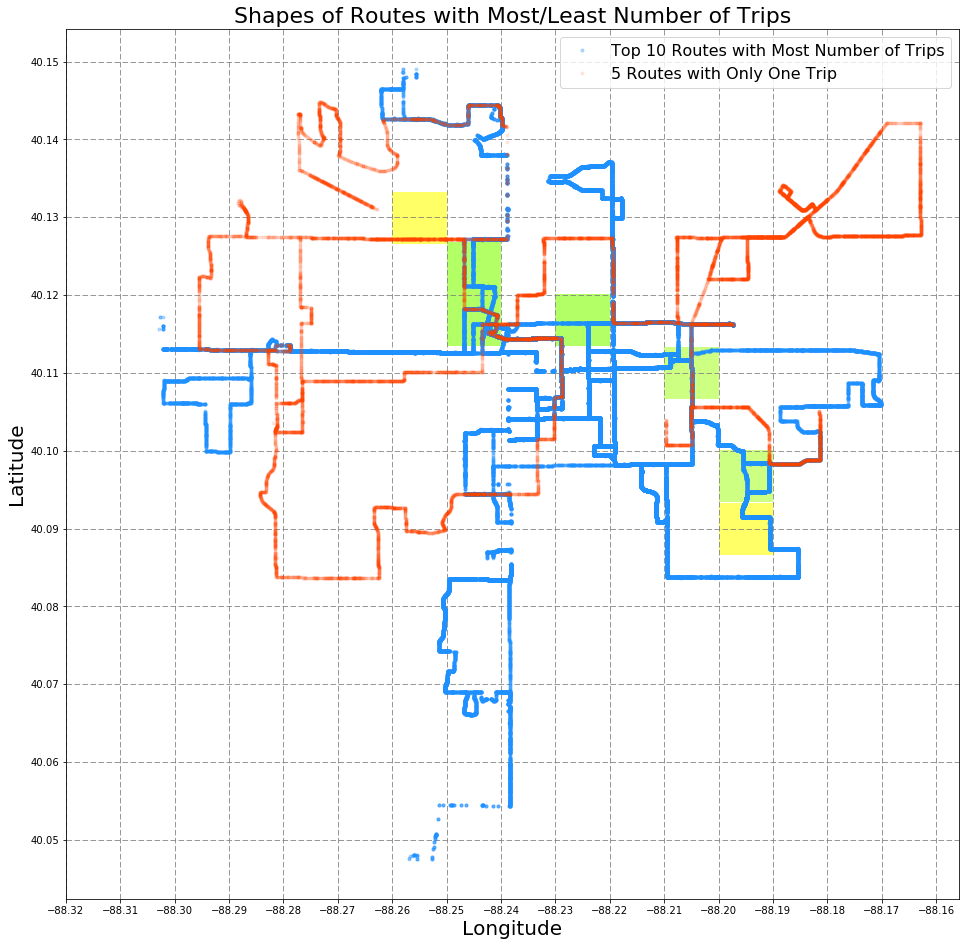

In [44]:
plt.plot(df_shapes["shape_pt_lon"],df_shapes["shape_pt_lat"],".",label="Top 10 Routes with Most Number of Trips",alpha=0.3,c="dodgerblue")
plt.plot(df_shapes_least["shape_pt_lon"],df_shapes_least["shape_pt_lat"],".",label="5 Routes with Only One Trip",alpha=0.1,c="orangered")
plt.xlabel("Longitude",fontsize=20)
plt.ylabel("Latitude",fontsize=20)
plt.title("Shapes of Routes with Most/Least Number of Trips",fontsize=22)
plt.grid(color='gray', linestyle='dashed')
plt.legend(prop={'size':16})

rectangle1=plt.Rectangle((-88.26,40.1266),width=0.01,height=0.0067,alpha=0.6,facecolor="yellow",edgecolor="None")
rectangle2=plt.Rectangle((-88.20,40.0866),width=0.01,height=0.0067,alpha=0.6,facecolor="yellow",edgecolor="None")
rectangle3=plt.Rectangle((-88.21,40.1066),width=0.01,height=0.0067,alpha=0.6,facecolor="#adff2f",edgecolor="None")
rectangle4=plt.Rectangle((-88.20,40.0934),width=0.01,height=0.0067,alpha=0.6,facecolor="#adff2f",edgecolor="None")
rectangle5=plt.Rectangle((-88.25,40.1134),width=0.01,height=0.0134,alpha=0.6,facecolor="#7fff00",edgecolor="None")
rectangle6=plt.Rectangle((-88.23,40.1134),width=0.01,height=0.0067,alpha=0.6,facecolor="#7fff00",edgecolor="None")

ax=plt.gca()
ax.set_yticks(np.arange(40.05,40.16,0.01))
ax.set_xticks(np.arange(-88.32,-88.15,0.01))
ax.add_patch(rectangle1)
ax.add_patch(rectangle2)
ax.add_patch(rectangle3)
ax.add_patch(rectangle4)
ax.add_patch(rectangle5)
ax.add_patch(rectangle6)